In [ ]:
############ Mapping data ################

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from plotnine import *
%matplotlib inline

In [9]:
import plotnine
from plotnine import ggplot, aes, geom_line, geom_point,  scale_x_timedelta, labs, geom_col,scale_fill_brewer, geom_bar, theme,element_text, position_dodge, geom_text


In [2]:
mapping = pd.read_csv("output_with_preds.csv")

In [3]:
mapping

,file_name,30_pred,50_pred,70_pred,80_pred,90_pred,RH_ICE,TEMP(F),datetime,date,Time of Day
0,20230222_094422.jpg,0,0,0,0,0,291.185065,-64.3360,2023-02-22 09:44:22,2023-02-22,Daytime
1,20230222_121823.jpg,1,0,0,0,0,338.441558,-63.6880,2023-02-22 12:18:23,2023-02-22,Daytime
2,20230222_122010.jpg,0,0,0,0,0,338.441558,-63.6880,2023-02-22 12:20:10,2023-02-22,Daytime
3,20230222_124035.jpg,0,0,0,0,0,338.441558,-63.6880,2023-02-22 12:40:35,2023-02-22,Daytime
4,20230222_124132.jpg,0,0,0,0,0,338.441558,-63.6880,2023-02-22 12:41:32,2023-02-22,Daytime
...,...,...,...,...,...,...,...,...,...,...,...
4229,IMG_20230819_130049.jpg,0,0,0,0,0,69.859307,-55.9875,2023-08-19 13:00:49,2023-08-19,Daytime
4230,IMG_20230819_140048.jpg,0,0,0,0,0,73.376623,-56.3450,2023-08-19 14:00:48,2023-08-19,Daytime
4231,IMG_20230819_150049.jpg,0,0,0,0,0,76.893939,-56.7025,2023-08-19 15:00:49,2023-08-19,Daytime
4232,IMG_20230819_160049.jpg,0,0,0,0,0,80.411255,-57.0600,2023-08-19 16:00:49,2023-08-19,Daytime


In [83]:
mapping.describe()

,30_pred,50_pred,70_pred,80_pred,90_pred,RH_ICE,TEMP(F),Pred
count,4234.000000,4234.000000,4234.000000,4234.000000,4234.0,4234.000000,4234.000000,4234.000000
mean,0.090458,0.058573,0.030231,0.009920,0.0,205.362892,-61.549213,0.189183
std,0.286871,0.234852,0.171244,0.099114,0.0,145.061143,9.088620,0.671632
min,0.000000,0.000000,0.000000,0.000000,0.0,-278.170996,-94.389835,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,87.861008,-68.836696,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,195.755986,-62.011817,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.0,308.476283,-54.684924,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,807.894120,-26.293214,4.000000


In [4]:
mapping.dtypes

file_name       object
30_pred          int64
50_pred          int64
70_pred          int64
80_pred          int64
90_pred          int64
RH_ICE         float64
TEMP(F)        float64
datetime        object
date            object
Time of Day     object
dtype: object

In [5]:
print(mapping.isnull().sum())

file_name      0
30_pred        0
50_pred        0
70_pred        0
80_pred        0
90_pred        0
RH_ICE         0
TEMP(F)        0
datetime       0
date           0
Time of Day    0
dtype: int64


In [65]:
mapping['30_pred'].mean()

0.09045819555975437

In [66]:
mapping['50_pred'].mean()

0.05857345299952763

In [67]:
mapping['70_pred'].mean()

0.030231459612659425

In [68]:
mapping['80_pred'].mean()

0.009919697685403874

In [69]:
mapping['90_pred'].mean()

0.0

In [75]:
mapping['RH_ICE'].median()

195.75598616209643

In [76]:
mapping['TEMP(F)'].median()

-62.011816964285686

In [6]:
mapping2 = mapping.groupby(['Time of Day'])['Time of Day'].count().reset_index(name='counts')

In [7]:
mapping2

,Time of Day,counts
0,Daytime,2444
1,Nighttime,1790


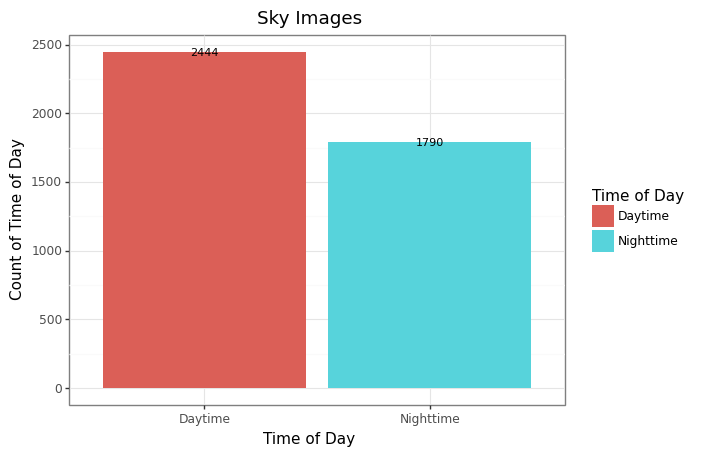

<ggplot: (8793356704531)>

In [112]:
ggplot(mapping2, aes('Time of Day', 'counts', fill = 'Time of Day', label = 'counts')) + labs(title="Sky Images", x="Time of Day", y="Count of Time of Day") + geom_bar(stat="identity") + geom_text(size = 8)


#mtcars$car = row.names(mtcars)
#theme_set(theme_bw())
#p = ggplot(mapping, aes(x='Time of Day', y='count', fill='Time of Day')) + geom_col(width = 1, color = "white") 

#p = p + coord_polar() + scale_fill_viridis_c(option = 'C', alpha = .8)
    
    
    


In [30]:
mapping['Pred'] = mapping['30_pred'] + mapping['50_pred'] + mapping['70_pred'] + mapping['80_pred'] + mapping['90_pred']



In [31]:
mappingPred

,30_pred,50_pred,70_pred,80_pred,90_pred
0,0,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
4229,0,0,0,0,0
4230,0,0,0,0,0
4231,0,0,0,0,0
4232,0,0,0,0,0


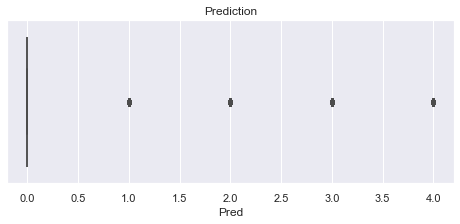

In [38]:
sns.boxplot( x="Pred", hue = "Pred", data=mapping ).set_title("Prediction");
mp.show()

<Axes: xlabel='Pred', ylabel='count'>

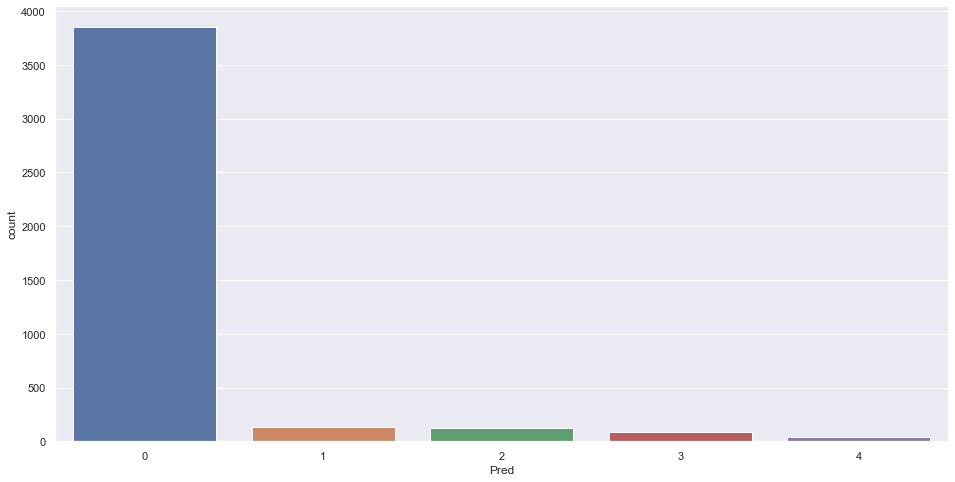

In [111]:
#ggplot(mapping)+aes(x='Pred')+geom_bar(fill = 'steelblue')
#ggplot(mapping, aes('Pred', 'RH_ICE', label = 'Pred')) + labs(title="Predictions count", x="Pred's", y="Count of Preds") + geom_bar(stat="identity") + geom_text(size = 8)

#sns.set(rc = {'figure.figsize':(16,8)})
sns.countplot(x="Pred", data=mapping)



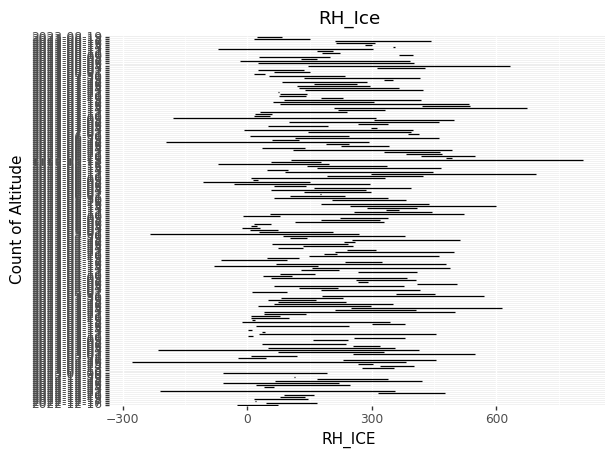

<ggplot: (8793249288831)>

In [64]:
ggplot(mapping, aes(x='RH_ICE', y='date')) + geom_line()+labs(title="RH_Ice",x="RH_ICE", y="Count of Altitude")


In [115]:
#correlation between independent variables

corr_matrix = mapping.corr()
corr_matrix

,30_pred,50_pred,70_pred,80_pred,90_pred,RH_ICE,TEMP(F),Pred
30_pred,1.000000,0.790942,0.559864,0.317396,NaN,0.043161,-0.113121,0.893282
50_pred,0.790942,1.000000,0.707845,0.401289,NaN,0.047019,-0.116458,0.927201
70_pred,0.559864,0.707845,1.000000,0.566916,NaN,0.035462,-0.090703,0.825275
80_pred,0.317396,0.401289,0.566916,1.000000,NaN,0.029191,-0.057604,0.568004
90_pred,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RH_ICE,0.043161,0.047019,0.035462,0.029191,NaN,1.000000,-0.268729,0.048226
TEMP(F),-0.113121,-0.116458,-0.090703,-0.057604,NaN,-0.268729,1.000000,-0.120666
Pred,0.893282,0.927201,0.825275,0.568004,NaN,0.048226,-0.120666,1.000000


/Users/indusharma/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior


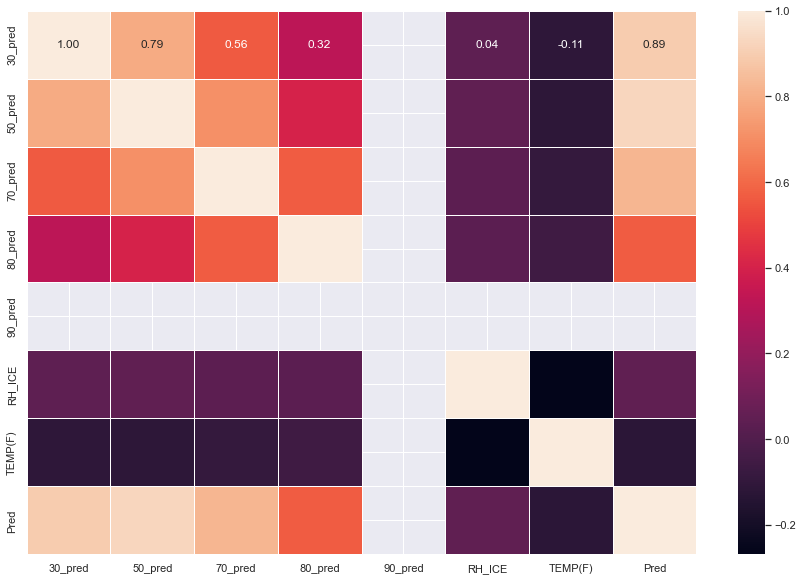

In [116]:
#plotting the corr matrix using seaborn heat map
corr_matrix = mapping.corr()
fig, heatmp = plt.subplots(figsize=(15,10))
heatmp = sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt='.2f')

In [117]:
mapping

,file_name,30_pred,50_pred,70_pred,80_pred,90_pred,RH_ICE,TEMP(F),datetime,date,Time of Day,Pred
0,20230222_094422.jpg,0,0,0,0,0,291.185065,-64.3360,2023-02-22 09:44:22,2023-02-22,Daytime,0
1,20230222_121823.jpg,1,0,0,0,0,338.441558,-63.6880,2023-02-22 12:18:23,2023-02-22,Daytime,1
2,20230222_122010.jpg,0,0,0,0,0,338.441558,-63.6880,2023-02-22 12:20:10,2023-02-22,Daytime,0
3,20230222_124035.jpg,0,0,0,0,0,338.441558,-63.6880,2023-02-22 12:40:35,2023-02-22,Daytime,0
4,20230222_124132.jpg,0,0,0,0,0,338.441558,-63.6880,2023-02-22 12:41:32,2023-02-22,Daytime,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4229,IMG_20230819_130049.jpg,0,0,0,0,0,69.859307,-55.9875,2023-08-19 13:00:49,2023-08-19,Daytime,0
4230,IMG_20230819_140048.jpg,0,0,0,0,0,73.376623,-56.3450,2023-08-19 14:00:48,2023-08-19,Daytime,0
4231,IMG_20230819_150049.jpg,0,0,0,0,0,76.893939,-56.7025,2023-08-19 15:00:49,2023-08-19,Daytime,0
4232,IMG_20230819_160049.jpg,0,0,0,0,0,80.411255,-57.0600,2023-08-19 16:00:49,2023-08-19,Daytime,0


In [122]:
mapping_30 = mapping[['file_name', '30_pred', 'RH_ICE', 'TEMP(F)', 'datetime', 'date', 'Time of Day']]




In [123]:
mapping_30

,file_name,30_pred,RH_ICE,TEMP(F),datetime,date,Time of Day
0,20230222_094422.jpg,0,291.185065,-64.3360,2023-02-22 09:44:22,2023-02-22,Daytime
1,20230222_121823.jpg,1,338.441558,-63.6880,2023-02-22 12:18:23,2023-02-22,Daytime
2,20230222_122010.jpg,0,338.441558,-63.6880,2023-02-22 12:20:10,2023-02-22,Daytime
3,20230222_124035.jpg,0,338.441558,-63.6880,2023-02-22 12:40:35,2023-02-22,Daytime
4,20230222_124132.jpg,0,338.441558,-63.6880,2023-02-22 12:41:32,2023-02-22,Daytime
...,...,...,...,...,...,...,...
4229,IMG_20230819_130049.jpg,0,69.859307,-55.9875,2023-08-19 13:00:49,2023-08-19,Daytime
4230,IMG_20230819_140048.jpg,0,73.376623,-56.3450,2023-08-19 14:00:48,2023-08-19,Daytime
4231,IMG_20230819_150049.jpg,0,76.893939,-56.7025,2023-08-19 15:00:49,2023-08-19,Daytime
4232,IMG_20230819_160049.jpg,0,80.411255,-57.0600,2023-08-19 16:00:49,2023-08-19,Daytime


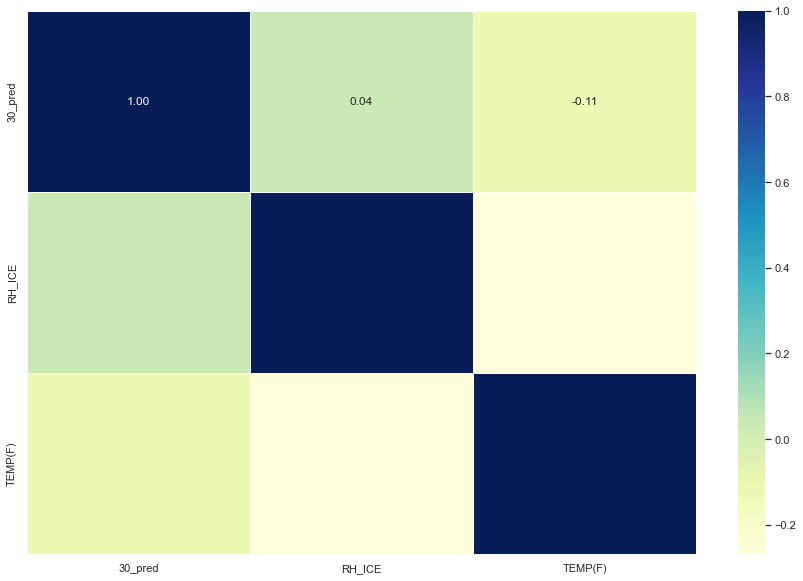

In [125]:
#plotting the corr matrix using seaborn heat map
corr_30matrix = mapping_30.corr()
fig, heatmp = plt.subplots(figsize=(15,10))
heatmp = sns.heatmap(corr_30matrix, cmap="YlGnBu", annot=True, linewidth=0.5, fmt='.2f')

In [127]:
mapping_30.to_csv('/Users/indusharma/Library/CloudStorage/OneDrive-GeorgeMasonUniversity-O365Production/Fall 2023/DEAN 690 _ F Brett Berlin/Development/pred_30_file.csv')


